# Model training to predict bike trips in cities SJ, SF, MV, RE

In [582]:
import seaborn as sb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler


In [583]:
# Function to plot the prediced values against the actual values
def plot_actual_vs_predicted(actual, predicted, legend_arr=None):
    figure, ax = plt.subplots()
    ax.scatter(actual, predicted, edgecolors=(0, 0, 0), color='g')
    ax.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    if(legend_arr is not None):
        ax.legend(legend_arr)
    ax.set_ylabel(legend_arr)
    plt.show()

In [584]:
# Reading the training data
train_sf = pd.read_csv('../data/prepped/train_main_sf.csv')
train_mv = pd.read_csv('../data/prepped/train_main_mv.csv')
train_sj = pd.read_csv('../data/prepped/train_main_sj.csv')
train_re = pd.read_csv('../data/prepped/train_main_re.csv')

In [585]:
# Convert all column datatype to float
train_sf = train_sf.astype(float)
train_mv = train_mv.astype(float)
train_sj = train_sj.astype(float)
train_re = train_re.astype(float)


In [586]:
train_sf.head()

,holiday,business_day,month,weekday,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,...,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,zip_code,fog,fog_rain,rain,rain_thunderstorm
0,0.0,0.0,8.0,1.0,56.0,49.0,41.0,45.0,40.0,36.0,...,1.0,10.0,0.0,3.0,290.0,94107.0,0.0,0.0,0.0,0.0
1,0.0,0.0,8.0,1.0,56.0,47.0,38.0,27.0,20.0,14.0,...,8.0,28.0,0.0,1.0,40.0,94107.0,0.0,0.0,0.0,0.0
2,0.0,0.0,8.0,0.0,60.0,54.0,48.0,48.0,46.0,43.0,...,6.0,17.0,0.0,4.0,310.0,94107.0,0.0,0.0,0.0,0.0
3,0.0,0.0,9.0,0.0,60.0,54.0,47.0,52.0,49.0,45.0,...,3.0,10.0,0.0,6.0,280.0,94107.0,1.0,0.0,0.0,0.0
4,0.0,0.0,9.0,1.0,58.0,52.0,46.0,51.0,46.0,42.0,...,6.0,22.0,0.0,4.0,281.0,94107.0,0.0,0.0,0.0,0.0


In [587]:
train_sf.shape

(733, 30)

In [588]:
train_mv.head()

,holiday,business_day,month,weekday,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,...,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,zip_code,fog,fog_rain,rain
0,0.0,0.0,8.0,1.0,59.0,46.0,34.0,44.0,36.0,28.0,...,14.0,2.0,14.0,0.0,0.0,348.0,94041.0,0.0,0.0,0.0
1,0.0,0.0,8.0,1.0,54.0,43.0,32.0,28.0,24.0,16.0,...,14.0,2.0,16.0,0.0,0.0,311.0,94041.0,0.0,0.0,0.0
2,0.0,0.0,8.0,0.0,63.0,49.0,40.0,50.0,41.0,34.0,...,14.0,1.0,14.0,0.0,2.0,350.0,94041.0,0.0,0.0,0.0
3,0.0,0.0,9.0,0.0,60.0,53.0,46.0,50.0,47.0,45.0,...,8.0,2.0,8.0,0.0,2.0,301.0,94041.0,0.0,0.0,0.0
4,0.0,0.0,9.0,1.0,59.0,49.0,43.0,50.0,42.0,37.0,...,20.0,1.0,20.0,0.0,3.0,261.0,94041.0,0.0,0.0,0.0


In [589]:
train_re.head()

,holiday,business_day,month,weekday,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,...,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,zip_code,fog,fog_rain,rain
0,0.0,0.0,8.0,1.0,55.0,47.0,39.0,45.0,38.0,36.0,...,6.0,0.0,6.0,0.0,1.0,54.0,94063.0,0.0,0.0,0.0
1,0.0,0.0,8.0,1.0,55.0,46.0,37.0,32.0,26.0,18.0,...,8.0,2.0,8.0,0.0,1.0,314.0,94063.0,0.0,0.0,0.0
2,0.0,0.0,8.0,0.0,59.0,52.0,44.0,50.0,44.0,39.0,...,7.0,2.0,7.0,0.0,2.0,342.0,94063.0,0.0,0.0,0.0
3,0.0,0.0,9.0,0.0,59.0,54.0,48.0,54.0,48.0,46.0,...,7.0,3.0,7.0,0.0,3.0,325.0,94063.0,0.0,0.0,0.0
4,0.0,0.0,9.0,1.0,57.0,50.0,44.0,50.0,45.0,41.0,...,8.0,2.0,8.0,0.0,4.0,269.0,94063.0,0.0,0.0,0.0


In [590]:
train_sj.head()

,holiday,business_day,month,weekday,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,...,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,zip_code,fog,fog_rain,rain
0,0.0,0.0,8.0,1.0,62.0,49.0,35.0,36.0,34.0,32.0,...,8.0,1.0,10.0,0.0,2.0,310.0,95113.0,0.0,0.0,0.0
1,0.0,0.0,8.0,1.0,53.0,42.0,30.0,27.0,23.0,18.0,...,8.0,3.0,10.0,0.0,0.0,129.0,95113.0,0.0,0.0,0.0
2,0.0,0.0,8.0,0.0,62.0,52.0,41.0,48.0,43.0,37.0,...,8.0,2.0,13.0,0.0,3.0,297.0,95113.0,0.0,0.0,0.0
3,0.0,0.0,9.0,0.0,61.0,54.0,46.0,50.0,47.0,44.0,...,9.0,2.0,10.0,0.0,4.0,293.0,95113.0,0.0,0.0,0.0
4,0.0,0.0,9.0,1.0,59.0,51.0,43.0,50.0,44.0,40.0,...,20.0,3.0,24.0,0.0,4.0,349.0,95113.0,0.0,0.0,0.0


In [601]:
# Count the number of columns in the dataset
len(train_sf.columns)

# Get list of columns
train_sf.shape


(733, 30)

In [604]:
train_mv.shape

(733, 29)

In [605]:
train_re.shape

(733, 29)

In [606]:
train_sj.shape

(733, 29)

In [607]:
# Find columns in train_sf not in train_mv
set(train_sf.columns) - set(train_mv.columns)

{'rain_thunderstorm'}

In [592]:
# Get the types for each column
train_sf.dtypes

holiday                           float64
business_day                      float64
month                             float64
weekday                           float64
max_temperature_f                 float64
mean_temperature_f                float64
min_temperature_f                 float64
max_dew_point_f                   float64
mean_dew_point_f                  float64
min_dew_point_f                   float64
max_humidity                      float64
mean_humidity                     float64
min_humidity                      float64
max_sea_level_pressure_inches     float64
mean_sea_level_pressure_inches    float64
min_sea_level_pressure_inches     float64
max_visibility_miles              float64
mean_visibility_miles             float64
min_visibility_miles              float64
max_wind_Speed_mph                float64
mean_wind_speed_mph               float64
max_gust_speed_mph                float64
precipitation_inches              float64
cloud_cover                       

In [593]:
# Loading the labels from csv
labels_sf = pd.read_csv('../data/prepped/labels_sf.csv')
labels_mv = pd.read_csv('../data/prepped/labels_mv.csv')
labels_sj = pd.read_csv('../data/prepped/labels_sj.csv')
labels_re = pd.read_csv('../data/prepped/labels_re.csv')

### Performing more analysis on data

#### Now that we have the training datasets, we will create validation sets 

In [602]:
train_sf.shape

(733, 30)

In [594]:
# Split train and test data
X_train_sf, X_test_sf, y_train_sf, y_test_sf = train_test_split(train_sf, labels_sf, test_size=0.2, random_state=42)
X_train_mv, X_test_mv, y_train_mv, y_test_mv = train_test_split(train_mv, labels_mv, test_size=0.2, random_state=42)
X_train_sj, X_test_sj, y_train_sj, y_test_sj = train_test_split(train_sj, labels_sj, test_size=0.2, random_state=42)
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(train_re, labels_re, test_size=0.2, random_state=42)


In [603]:
X_train_sf.shape

(586, 30)

In [595]:
X_train_sf_1, X_test_sf_1, y_train_sf_1, y_test_sf_1 = train_test_split(train_sf, labels_sf, test_size=0.2, random_state=42)


In [596]:
X_train_sf_1.head()

# Save X_train_sf_1 to csv file
X_train_sf_1.to_csv('../data/X_train_sf_1.csv', index=False)

In [597]:

# Get all the column names from the training data
cols = X_train_sf_1.columns

In [598]:
print(cols)

# Write cols to txt file
with open('model/cols.txt', 'w') as f:
    for item in cols:
        f.write("%s\n" % item)

Index(['holiday', 'business_day', 'month', 'weekday', 'max_temperature_f',
       'mean_temperature_f', 'min_temperature_f', 'max_dew_point_f',
       'mean_dew_point_f', 'min_dew_point_f', 'max_humidity', 'mean_humidity',
       'min_humidity', 'max_sea_level_pressure_inches',
       'mean_sea_level_pressure_inches', 'min_sea_level_pressure_inches',
       'max_visibility_miles', 'mean_visibility_miles', 'min_visibility_miles',
       'max_wind_Speed_mph', 'mean_wind_speed_mph', 'max_gust_speed_mph',
       'precipitation_inches', 'cloud_cover', 'wind_dir_degrees', 'zip_code',
       'fog', 'fog_rain', 'rain', 'rain_thunderstorm'],
      dtype='object')


#### Scaling the data

In [599]:
scalar = MinMaxScaler()

In [600]:
X_train_mv.shape

(586, 29)

In [581]:
scalar.fit(X_train_sf)
X_train_sf = scalar.transform(X_train_sf)
X_test_sf = scalar.transform(X_test_sf)

scalar.fit(X_train_mv)
X_train_mv = scalar.transform(X_train_mv)
X_test_mv = scalar.transform(X_test_mv)

scalar.fit(X_train_sj)
X_train_sj = scalar.transform(X_train_sj)
X_test_sj = scalar.transform(X_test_sj)

scalar.fit(X_train_re)
X_train_re = scalar.transform(X_train_re)
X_test_re = scalar.transform(X_test_re)

In [562]:
X_train_mv.shape

(586, 29)

## Trying the RandomForestRegressor

In [516]:
rndForestReg = RandomForestRegressor(n_estimators=50, min_samples_leaf=3, random_state=42, bootstrap=False)
preds = cross_val_predict(rndForestReg, X_train_sf, y_train_sf, cv=20)

c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:862: DataConversionWarning: A column-vector y wa

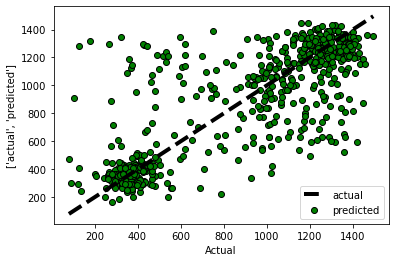

In [517]:
# Plotting the predicted values against the actual values
plot_actual_vs_predicted(y_train_sf, preds, ['actual', 'predicted'])

Exporting 

In [612]:
with open('model/xgbr_mv.pkl', 'wb') as f:
    pickle.dump(xgbr_mv, f)


In [614]:
model_new = pickle.load(open('model/xgbr_mv.pkl', 'rb'))
model_new

GradientBoostingRegressor(n_estimators=50, random_state=42)

In [621]:
labels_re = pd.read_csv('python_code/data/labels_re.csv')
labels_re.head()

,trip_count
0,742
1,699
2,628
3,683
4,652


In [624]:
labels_re.values.reshape(-1)

array([ 742,  699,  628,  683,  652,  592,  599,  671,  810,  786,  688,
        765,  892,  876,  933,  969,  690,  613,  912, 1065, 1106, 1044,
       1100,  384,  567, 1044, 1070, 1260, 1079, 1094,  606,  512,  969,
       1063, 1057, 1150, 1084,  709,  597,  961, 1009, 1064, 1085, 1011,
        659,  561, 1040, 1166, 1159, 1224, 1097,  622,  443, 1014, 1025,
       1026, 1051, 1041,  486,  287,  965, 1007, 1121, 1148, 1118,  537,
        371, 1122, 1156, 1083, 1193, 1166,  622,  479,  981, 1151, 1001,
       1112, 1124,  466,  404, 1005,  750,  622, 1101,  993,  521,  343,
       1018, 1002,  717,  266,  369,  303,  324,  877,  915,  990,  933,
        725,  276,  274,  806,  877,  901,  963,  961,  387,  311,  940,
        975,  925,  934,  866,  350,  292,  644,  330,  355,  419,  422,
        395,  311,  601,  498,  352,  765,  771,  353,  294,  910,  966,
        963,  977,  982,  243,  348, 1011, 1026, 1098, 1095, 1012,  435,
        393,  611, 1008, 1069, 1093, 1019,  438,  3

In [619]:
X_test_mv.iloc[0].values

array([0.0000e+00, 0.0000e+00, 6.0000e+00, 1.0000e+00, 7.7000e+01,
       6.9000e+01, 6.1000e+01, 6.1000e+01, 6.0000e+01, 5.8000e+01,
       9.0000e+01, 7.5000e+01, 6.0000e+01, 2.9930e+01, 2.9890e+01,
       2.9830e+01, 1.0000e+01, 1.0000e+01, 8.0000e+00, 2.2000e+01,
       5.0000e+00, 2.5000e+01, 1.0000e-02, 1.0000e+00, 3.5700e+02,
       9.4041e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00])

In [615]:
model_new.predict(X_test_mv)

array([248.11393035, 248.11393035, 248.11393035, 248.11393035,
       248.11393035, 248.11393035, 248.11393035, 159.4876592 ,
       159.4876592 , 159.4876592 , 295.46355828, 248.11393035,
       248.11393035, 295.46355828, 159.4876592 , 248.11393035,
       159.4876592 , 180.44996708, 248.11393035, 248.11393035,
       248.11393035, 159.4876592 , 159.4876592 , 159.4876592 ,
       248.11393035, 248.11393035, 248.11393035, 248.11393035,
       180.44996708, 248.11393035, 248.11393035, 248.11393035,
       248.11393035, 295.46355828, 248.11393035, 159.4876592 ,
       248.11393035, 248.11393035, 248.11393035, 159.4876592 ,
       248.11393035, 248.11393035, 248.11393035, 248.11393035,
       248.11393035, 248.11393035, 159.4876592 , 248.11393035,
       248.11393035, 248.11393035, 248.11393035, 248.11393035,
       248.11393035, 180.44996708, 508.16007748, 248.11393035,
       159.4876592 , 248.11393035, 248.11393035, 159.4876592 ,
       159.4876592 , 248.11393035, 292.76620494, 248.11

In [518]:
# Get the rmse score
scores_rf = cross_val_score(rndForestReg, X_train_sf, y_train_sf, scoring="neg_mean_squared_error", cv=15)
rmse_scores_rf = np.sqrt(-scores_rf)

c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

In [519]:
print("Mean:", rmse_scores_rf.mean())

Mean: 246.0224278901508


## Now trying ExtraTrees Regressor

In [520]:
# Training the EXT trees regressor model
extTreesReg = ExtraTreesRegressor(n_estimators=50, min_samples_leaf=3, random_state=42, bootstrap=False)
preds = cross_val_predict(extTreesReg, X_train_sf, y_train_sf, cv=20)


c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:862: DataConversionWarning: A column-vector y wa

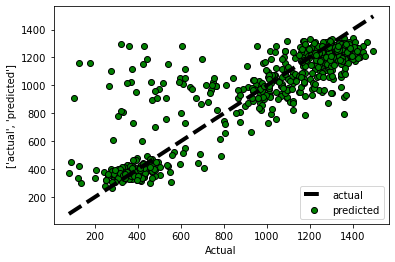

In [521]:
# Plot the actual vs predicted values
plot_actual_vs_predicted(y_train_sf, preds, ['actual', 'predicted'])

In [522]:
# Print the rmse score
scores_ext = cross_val_score(extTreesReg, X_train_sf, y_train_sf, scoring="neg_mean_squared_error", cv=20)
rmse_scores_ext = np.sqrt(-scores_ext)


c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

In [523]:
print("Mean:", rmse_scores_ext.mean())

Mean: 191.4568578728881


## Now trying XG Boost Regression

In [524]:
# Training the XG Boost regressor moddel
xgbr = XGBRegressor(n_estimators=50, random_state=42, bootstrap=False)
preds = cross_val_predict(xgbr, X_train_sf, y_train_sf, cv=20)

[02:19:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:20] WARNI

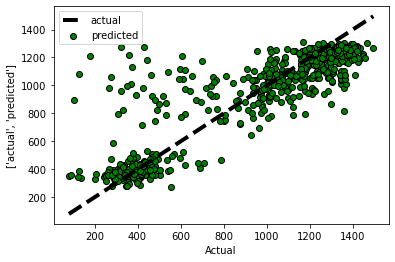

In [525]:
# Plot the actual vs predicted values
plot_actual_vs_predicted(y_train_sf, preds, ['actual', 'predicted'])

In [526]:
# Print the rmse score
scores_xgb = cross_val_score(xgbr, X_train_sf, y_train_sf, scoring="neg_mean_squared_error", cv=20)
rmse_scores_xgb = np.sqrt(-scores_xgb)


[02:19:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:21] WARNI

In [527]:
print("Mean:", rmse_scores_xgb.mean())

Mean: 190.04415346769554


## Now trying the KNN regressor

In [528]:
# Training the KNN model
knn = KNeighborsRegressor(n_neighbors=5)
preds = cross_val_predict(knn, X_train_sf, y_train_sf, cv=20)


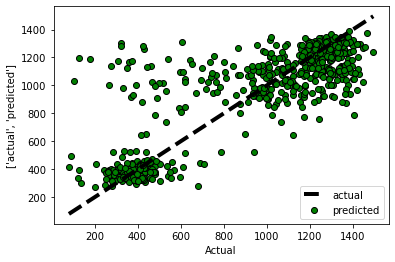

In [529]:
# Plot the actual vs predicted values
plot_actual_vs_predicted(y_train_sf, preds, ['actual', 'predicted'])

In [530]:
# Print the rmse score
scores_knn = cross_val_score(knn, X_train_sf, y_train_sf, scoring="neg_mean_squared_error", cv=20)
rmse_scores_knn = np.sqrt(-scores_knn)

print("Mean:", rmse_scores_knn.mean())

Mean: 224.30901486110116


## Trying out Lasso regression

In [531]:
# Training the Lasso model
lasso = Lasso(alpha=0.1)
preds = cross_val_predict(lasso, X_train_sf, y_train_sf, cv=20)


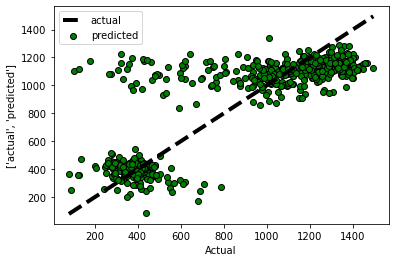

In [532]:
# Plot the actual vs predicted values
plot_actual_vs_predicted(y_train_sf, preds, ['actual', 'predicted'])

In [533]:
# Print the rmse score
scores_lasso = cross_val_score(lasso, X_train_sf, y_train_sf, scoring="neg_mean_squared_error", cv=20)
rmse_scores_lasso = np.sqrt(-scores_lasso)


In [534]:

print("Mean:", rmse_scores_lasso.mean())

Mean: 227.7642490713397


## Trying out Gradient Boosting Regressor

In [535]:
gbr = GradientBoostingRegressor(n_estimators=50, random_state=42)
preds = cross_val_predict(gbr, X_train_sf, y_train_sf, cv=20)


c:\Users\akaid\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

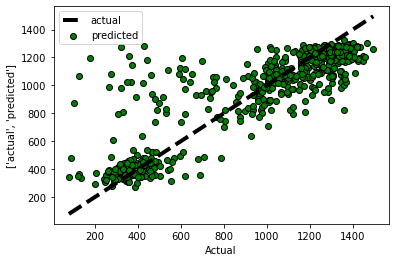

In [536]:
plot_actual_vs_predicted(y_train_sf, preds, ['actual', 'predicted'])

In [537]:
# Print the rmse score
scores_gbr = cross_val_score(gbr, X_train_sf, y_train_sf, scoring="neg_mean_squared_error", cv=20)
rmse_scores_gbr = np.sqrt(-scores_gbr)


c:\Users\akaid\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [538]:
print("Mean:", rmse_scores_gbr.mean())

Mean: 190.07463378303436


### Observations:

| Model Used | RMSE score | Comment |
| --- | ----------- | ------------------------- |
| RandomForestRegressor | Mean: 244.93066578416932 | Relatively poor performance on the dataset |
| ExtraTreesRegressor | Mean: 190.85381124146784 | Good performance |
| XGBoostRegressor | Mean: 190.07682660893977 | Good performance, better than EXT |
| KNNRegressor | Mean: 452.83107968791774 | Worst performance |
| LassoRegression | Mean: 228.4479173644267 | Relatively poor performance |
| GradientBoosting | Mean: 190.07463378303436 | Good Performance |

ExtraTreesRegressor, GradientBoosting and XGBoostRegressor seem to be performing the highest in this case.


#### **We will choose GradientBoostingRegressor because it seems to be the highest performing algorithm**

Now, we have a baseline for what model we want to use. Now, we will try hyperparameter tuning for the model

#### Tuning for n_estimators

In [539]:
# # Training the gradientboost model
# n_estimators_gb = [10,25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500]
# result_list = list()
# for n in n_estimators_gb:
#     gbr = GradientBoostingRegressor(n_estimators=n, random_state=42)
#     preds = cross_val_predict(gbr, X_train_sf, y_train_sf, cv=20)
#     scores_gbr = cross_val_score(gbr, X_train_sf, y_train_sf, scoring="neg_mean_squared_error", cv=20)
#     rmse_scores_xbr = np.sqrt(-scores_gbr)
#     result_list.append(rmse_scores_gbr.mean())


In [540]:
# scores = [i for i in result_list]

# plt.plot(n_estimators_gb, scores)
# plt.ylabel("RMSE score")
# plt.xlabel("n_estimators")
# plt.title("For GradientBoost")

### Now, we will train the model with decided params. for each city.

In [541]:
# Train xgbr model for all cities
xgbr_sf = GradientBoostingRegressor(n_estimators=50, random_state=42)
xgbr_sj = GradientBoostingRegressor(n_estimators=50, random_state=42)
xgbr_mv = GradientBoostingRegressor(n_estimators=50, random_state=42)
xgbr_re = GradientBoostingRegressor(n_estimators=50, random_state=42)

# San Francisco
xgbr_sf.fit(X_train_sf, y_train_sf)
preds_sf = xgbr_sf.predict(X_test_sf)

# San Jose
xgbr_sj.fit(X_train_sj, y_train_sj)
preds_sj = xgbr_sj.predict(X_test_sj)

# Mountain View
xgbr_mv.fit(X_train_mv, y_train_mv)
preds_mv = xgbr_mv.predict(X_test_mv)

# Redwood City
xgbr_re.fit(X_train_re, y_train_re)
preds_re = xgbr_re.predict(X_test_re)


c:\Users\akaid\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [542]:
# Function to plot the actual vs predicted values
def plot_preds(y_test, preds, cityName):
    plt.figure(figsize=(20,10))
    plt.plot(preds, color='red')
    plt.plot(y_test, color='blue')
    plt.legend(['Prediction', 'Acutal'])
    plt.ylabel("Number of Trips")
    plt.xlabel("Predicted Date")
    plt.title("Predicted Values vs Actual Values for {}".format(cityName))
    plt.show()

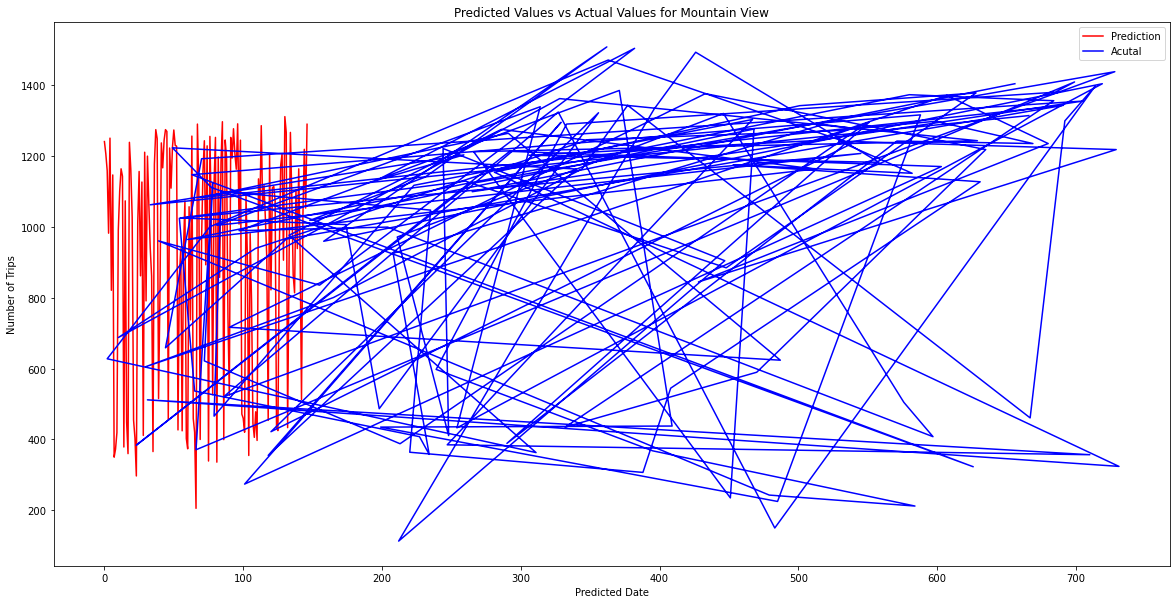

In [543]:
# Plotting the predicted values for San Francisco
plot_preds(y_test_mv, preds_mv, "Mountain View")

Hmmmmmm, something went wrong here. 

In [544]:
y_test_mv.head()

,trip_count
666,1315
33,1063
259,1204
196,1132
382,1505


I think we need to reset the index as all the values seem to be out of place.

In [545]:
y_test_mv.reset_index(drop = True, inplace = True)
y_test_mv.head()

,trip_count
0,1315
1,1063
2,1204
3,1132
4,1505


In [546]:
y_test_mv.reset_index(drop = True, inplace = True)
y_test_sf.reset_index(drop = True, inplace = True)
y_test_sj.reset_index(drop = True, inplace = True)
y_test_re.reset_index(drop = True, inplace = True)


# Violla !!!!!!!!!!!!!!!!!!!!!!!!!!!!

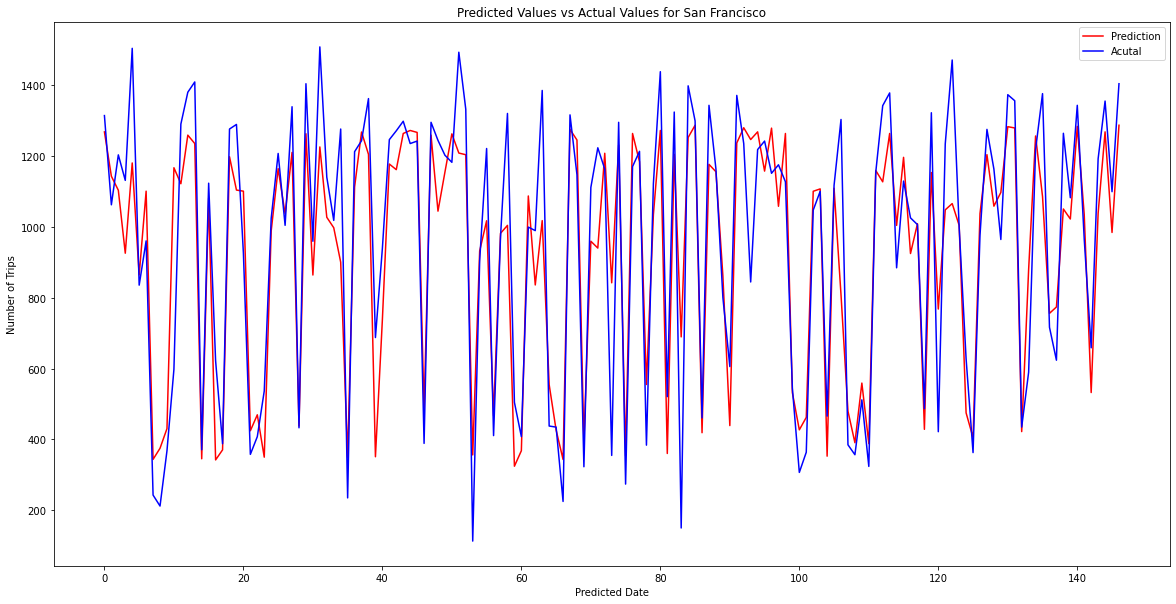

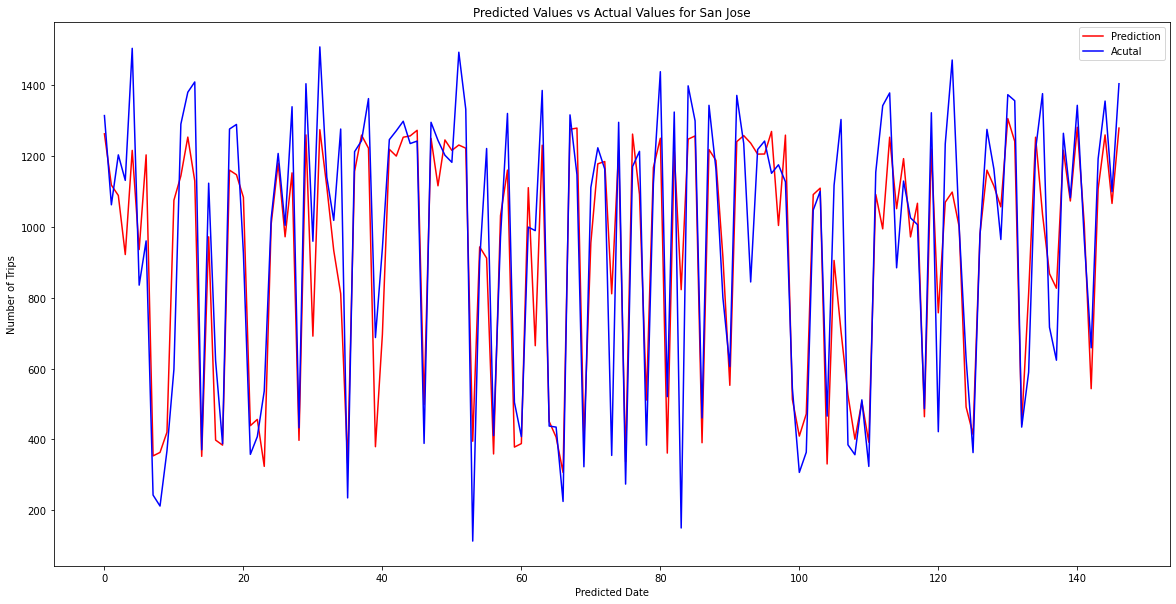

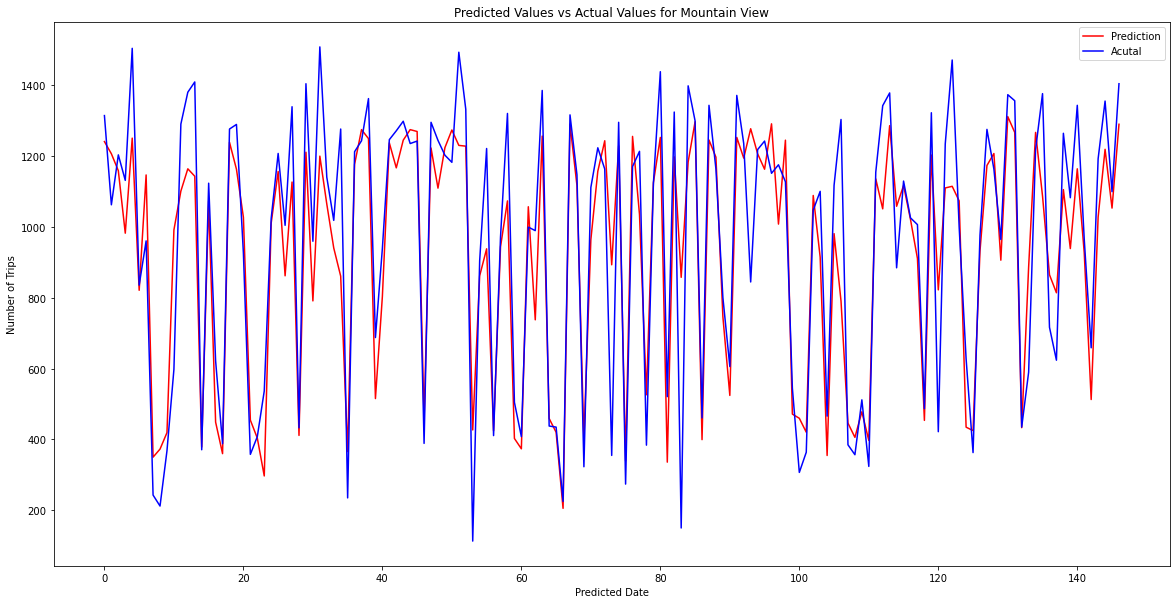

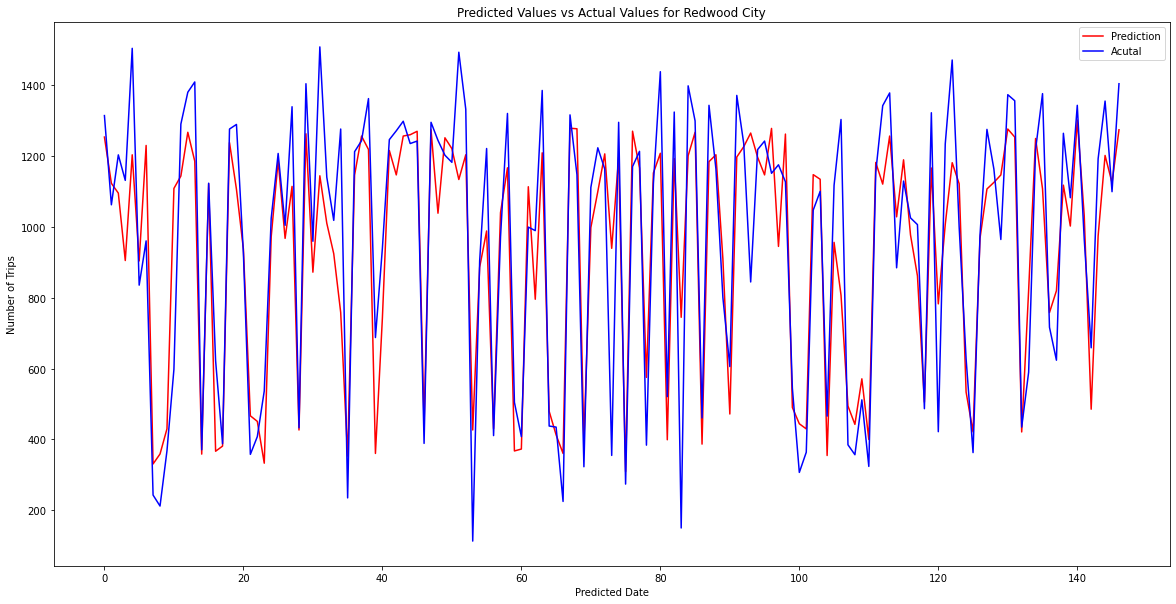

In [547]:
# Plot the preds for each city
plot_preds(y_test_sf, preds_sf, "San Francisco")
plot_preds(y_test_sj, preds_sj, "San Jose")
plot_preds(y_test_mv, preds_mv, "Mountain View")
plot_preds(y_test_re, preds_re, "Redwood City")

### Now, to build the webapp

In [548]:
import pickle

In [549]:
pickle.dump(xgbr_sf, open("model/sf.pkl", "wb"))
pickle.dump(xgbr_sj, open("model/sj.pkl", "wb"))
pickle.dump(xgbr_mv, open("model/mv.pkl", "wb"))
pickle.dump(xgbr_re, open("model/re.pkl", "wb"))
